In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
data = load_digits()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=data.target)
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1257, 64), (1257,), (540, 64), (540,))

In [5]:
y_train_ohe.shape, y_test_ohe.shape

((1257, 10), (540, 10))

In [6]:
model = Sequential()
model.add(Input(shape=(64,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy',])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, 
                    y_train_ohe, 
                    validation_data=(X_test, y_test_ohe), 
                    epochs=20, 
                    verbose=1)

Epoch 1/20
40/40 [==============================] - 0s 3ms/step - loss: 2.1990 - accuracy: 0.5076 - val_loss: 0.7703 - val_accuracy: 0.7611
Epoch 2/20
40/40 [==============================] - 0s 757us/step - loss: 0.6012 - accuracy: 0.8083 - val_loss: 0.4305 - val_accuracy: 0.8574
Epoch 3/20
40/40 [==============================] - 0s 725us/step - loss: 0.4323 - accuracy: 0.8473 - val_loss: 0.3162 - val_accuracy: 0.8926
Epoch 4/20
40/40 [==============================] - 0s 704us/step - loss: 0.3323 - accuracy: 0.8854 - val_loss: 0.2944 - val_accuracy: 0.9093
Epoch 5/20
40/40 [==============================] - 0s 727us/step - loss: 0.2554 - accuracy: 0.9204 - val_loss: 0.2631 - val_accuracy: 0.9019
Epoch 6/20
40/40 [==============================] - 0s 733us/step - loss: 0.2453 - accuracy: 0.9252 - val_loss: 0.2218 - val_accuracy: 0.9148
Epoch 7/20
40/40 [==============================] - 0s 717us/step - loss: 0.2024 - accuracy: 0.9348 - val_loss: 0.2050 - val_accuracy: 0.9352
Epoch 8/

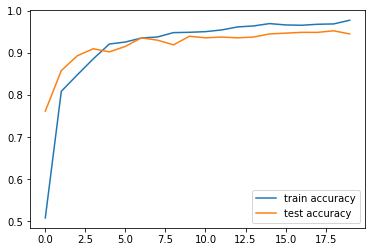

In [10]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

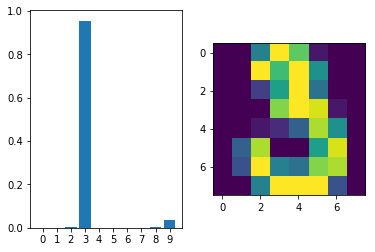

In [11]:
num = 25

result = model.predict(X_test[num].reshape(-1,64)).squeeze()

plt.subplot(121)
plt.bar(x=range(10), height=result)
plt.xticks(range(10))

plt.subplot(122)
plt.imshow(X_test[num].reshape(8,8))

plt.show()